In [1]:
import config
import requests

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [2]:
## Need to exclude states that aren't in the continental US
df = pd.read_csv("../input/eji.csv")
fips = pd.read_csv("../input/state_fips.csv")

df_joined = df.merge(fips, left_on="statefp", right_on="STATE", how='left')
display(df_joined.head())

df_joined = df_joined[~df_joined["STATE_NAME"].isin(["Alaska"])]
df_joined = df_joined[df_joined['EP_ASTHMA'].notna()]

display(df_joined.groupby("STATE")["EP_ASTHMA"].mean())
display(df_joined["STATE"].nunique())
display(df_joined["STATE_NAME"].unique())

#df_joined[df_joined["STATE"] == 2]

C:\Users\keyasengupta\AppData\Local\Temp\ipykernel_17456\2495288979.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../input/eji.csv")


,OBJECTID,statefp,countyfp,tractce,affgeoid,geoid,name,COUNTY,StateAbbr,StateDesc,...,EPL_ASTHMA,EPL_CANCER,EPL_DIABETES,EPL_MHLTH,SHAPE__Length,SHAPE__Area,STATE,STUSAB,STATE_NAME,STATENS
0,1,1,1,20100,1400000US01001020100,1001020100,201.0,Autauga,AL,Alabama,...,0.54,0.49,0.52,0.63,"15,873.70","9,883,863.50",1,AL,Alabama,1779775
1,2,1,1,20200,1400000US01001020200,1001020200,202.0,Autauga,AL,Alabama,...,0.86,0.27,0.83,0.82,"9,764.61","3,325,691.60",1,AL,Alabama,1779775
2,3,1,1,20300,1400000US01001020300,1001020300,203.0,Autauga,AL,Alabama,...,0.72,0.52,0.66,0.77,"10,489.20","5,379,045.63",1,AL,Alabama,1779775
3,4,1,1,20400,1400000US01001020400,1001020400,204.0,Autauga,AL,Alabama,...,0.37,0.88,0.56,0.41,"12,162.23","6,355,819.12",1,AL,Alabama,1779775
4,5,1,1,20500,1400000US01001020500,1001020500,205.0,Autauga,AL,Alabama,...,0.43,0.43,0.33,0.50,"16,890.07","11,462,115.49",1,AL,Alabama,1779775


STATE
1     10.874405
4     10.551285
5     10.377810
6      9.084548
8      9.470475
9     10.370205
10     9.949533
11    11.298883
12     8.893883
13     9.807665
16     9.668350
17     9.781136
18    10.626941
19     8.776092
20     9.911827
21    11.139657
22     9.960089
23    11.351282
24     9.770000
25    10.461202
26    11.220015
27     8.671760
28    10.619423
29    10.044957
30     9.867407
31     8.800188
32     8.937206
33    10.527055
34     9.513893
35    10.393186
36    10.644818
37     9.931814
38     9.206341
39    10.170846
40    10.824379
41    11.026513
42    10.457049
44    11.690000
45     9.820000
46     9.024775
47    10.844669
48     9.150564
49     9.534471
50    10.960109
51     9.220873
53    10.084567
54    11.415876
55     9.674085
56     9.262595
Name: EP_ASTHMA, dtype: float64

49

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [18]:
maryland = df_.iloc[np.where(df.StateAbbr == "MD")]
maryland.head()

,OBJECTID,statefp,countyfp,tractce,affgeoid,geoid,name,COUNTY,StateAbbr,StateDesc,...,EP_CANCER,EP_MHLTH,EP_DIABETES,EPL_BPHIGH,EPL_ASTHMA,EPL_CANCER,EPL_DIABETES,EPL_MHLTH,SHAPE__Length,SHAPE__Area
29742,29714,24,1,100,1400000US24001000100,24001000100,1.0,Allegany,MD,Marylan,...,8.3,15.6,14.2,0.85,0.76,0.85,0.82,0.68,"135,914.18","494,119,399.37"
29743,29715,24,1,200,1400000US24001000200,24001000200,2.0,Allegany,MD,Marylan,...,6.4,13.5,10.8,0.75,0.40,0.43,0.51,0.44,"76,448.83","127,947,498.30"
29744,29716,24,1,300,1400000US24001000300,24001000300,3.0,Allegany,MD,Marylan,...,9.0,14.3,13.2,0.83,0.67,0.93,0.75,0.54,"23,494.04","22,392,884.21"
29745,29717,24,1,400,1400000US24001000400,24001000400,4.0,Allegany,MD,Marylan,...,8.7,14.6,12.9,0.83,0.70,0.90,0.73,0.57,"18,151.60","9,703,552.18"
29746,29718,24,1,500,1400000US24001000500,24001000500,5.0,Allegany,MD,Marylan,...,7.7,17.7,14.8,0.89,0.88,0.73,0.85,0.84,"16,094.30","11,591,638.94"


In [3]:
df_joined.groupby(["STATE", "COUNTY"])["EP_ASTHMA"].mean()
df_joined["geocoded"] = [tuple(requests.get(f"https://api.mapbox.com/geocoding/v5/mapbox.places/{df_joined.iloc[a]['COUNTY']} {df_joined.iloc[a]['STATE_NAME']} UNITED STATES.json", 
                   params={"access_token": config.api_token}).json()["features"][0]["center"]) 
                      for a in range(len(df_joined))]

In [21]:
maryland["geocoded"] = [tuple(requests.get(f"https://api.mapbox.com/geocoding/v5/mapbox.places/{maryland.iloc[a]['COUNTY']} {maryland.iloc[a]['StateDesc']} UNITED STATES.json", 
                   params={"access_token": config.api_token}).json()["features"][0]["center"]) 
                      for a in range(len(maryland))]

C:\Users\keyasengupta\AppData\Local\Temp\ipykernel_28584\4050860456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maryland["geocoded"] = [tuple(requests.get(f"https://api.mapbox.com/geocoding/v5/mapbox.places/{maryland.iloc[a]['COUNTY']} {maryland.iloc[a]['StateDesc']} UNITED STATES.json",


In [4]:
df_joined = pd.concat([df_joined, df_joined["geocoded"].apply(pd.Series).rename(columns={0: "LON", 1: "LAT"})], axis=1)
df_joined

,OBJECTID,statefp,countyfp,tractce,affgeoid,geoid,name,COUNTY,StateAbbr,StateDesc,...,EPL_MHLTH,SHAPE__Length,SHAPE__Area,STATE,STUSAB,STATE_NAME,STATENS,geocoded,LON,LAT
0,1,1,1,20100,1400000US01001020100,1001020100,201.00,Autauga,AL,Alabama,...,0.63,"15,873.70","9,883,863.50",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
1,2,1,1,20200,1400000US01001020200,1001020200,202.00,Autauga,AL,Alabama,...,0.82,"9,764.61","3,325,691.60",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
2,3,1,1,20300,1400000US01001020300,1001020300,203.00,Autauga,AL,Alabama,...,0.77,"10,489.20","5,379,045.63",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
3,4,1,1,20400,1400000US01001020400,1001020400,204.00,Autauga,AL,Alabama,...,0.41,"12,162.23","6,355,819.12",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
4,5,1,1,20500,1400000US01001020500,1001020500,205.00,Autauga,AL,Alabama,...,0.50,"16,890.07","11,462,115.49",1,AL,Alabama,1779775,"(-86.64833, 32.53667)",-86.648330,32.536670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72898,72827,56,43,200,1400000US56043000200,56043000200,2.00,Washakie,WY,Wyoming,...,0.29,"410,974.00","5,791,357,714.34",56,WY,Wyoming,1779807,"(-107.90298, 44.03134)",-107.902980,44.031340
72899,72828,56,43,301,1400000US56043000301,56043000301,3.01,Washakie,WY,Wyoming,...,0.42,"5,872.63","1,991,782.35",56,WY,Wyoming,1779807,"(-107.90298, 44.03134)",-107.902980,44.031340
72900,72829,56,43,302,1400000US56043000302,56043000302,3.02,Washakie,WY,Wyoming,...,0.33,"31,827.09","16,087,295.56",56,WY,Wyoming,1779807,"(-107.90298, 44.03134)",-107.902980,44.031340
72901,72830,56,45,951100,1400000US56045951100,56045951100,9511.00,Weston,WY,Wyoming,...,0.40,"371,748.34","6,102,192,170.33",56,WY,Wyoming,1779807,"(-105.239454, 44.780582)",-105.239454,44.780582


In [16]:
df_joined.to_csv("../output/eji_df.csv")

In [25]:
maryland.to_csv("../output/maryland_eji.csv")

C:\Users\keyasengupta\anaconda2\envs\py38\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


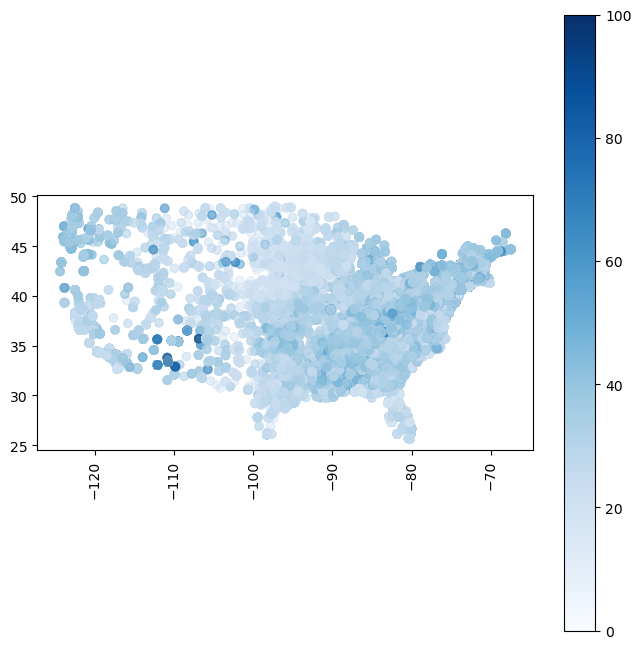

In [5]:
us_boundary = gpd.read_file("../input/s_22mr22.shp")

geom = [Point(x) for x in df_joined.geocoded]
geo_df = gpd.GeoDataFrame(df_joined, 
                          crs = {'init':'EPSG:4326'}, 
                          geometry = geom)

fig, ax = plt.subplots(1, figsize=(8, 8))
plt.xticks(rotation=90)

geo_df.plot(column="EP_ASTHMA", alpha = 0.4, cmap="Blues", ax=ax)

bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=100))
bar_info._A = []
cbar = fig.colorbar(bar_info)

In [15]:
geo_df[(geo_df["STATE_NAME"] == "Washington") & ((geo_df["LON"] < -125) | (geo_df["LON"] > 50))]

,OBJECTID,statefp,countyfp,tractce,affgeoid,geoid,name,COUNTY,StateAbbr,StateDesc,...,SHAPE__Length,SHAPE__Area,STATE,STUSAB,STATE_NAME,STATENS,geocoded,LON,LAT,geometry


In [6]:
#us_boundary = gpd.read_file("../input/s_22mr22.shp")

tri_2020 = pd.read_csv("../input/tri_2020_us.csv")
tri_2020.head()

C:\Users\keyasengupta\AppData\Local\Temp\ipykernel_17456\3293930982.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tri_2020 = pd.read_csv("../input/tri_2020_us.csv")


,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,...,109. 8.2 - ENERGY RECOVER ON,110. 8.3 - ENERGY RECOVER OF,111. 8.4 - RECYCLING ON SITE,112. 8.5 - RECYCLING OFF SIT,113. 8.6 - TREATMENT ON SITE,114. 8.7 - TREATMENT OFF SITE,115. PRODUCTION WSTE (8.1-8.7),116. 8.8 - ONE-TIME RELEASE,117. PROD_RATIO_OR_ ACTIVITY,118. 8.9 - PRODUCTION RATIO
0,2020,2974WCMSTL6371C,110040511407,C.M. STEEL INC.,6371 CAMPBELL ROAD,YORK,YORK,SC,29745,NaN,...,0.0,0.0,0.0,31234.0,0.0,0.00,31259.328,NaN,PRODUCTION,1.10
1,2020,53218RLBLP5230S,110000418922,RELIABLE PLATING WORKS INC.,5230 S 13TH ST,MILWAUKEE,MILWAUKEE,WI,53221,NaN,...,0.0,0.0,0.0,9079.0,0.0,0.00,9086.000,NaN,ACTIVITY,0.72
2,2020,1632WMSTBL24TWM,110070056822,AM STABILIZERS CORP,240 TWO MILE RUN RD,FRANKLIN,VENANGO,PA,16323,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,1074.000,NaN,PRODUCTION,0.59
3,2020,77015FRMNT2239H,110000460965,GB BIOSCIENCES LLC,2239 HADEN RD,HOUSTON,HARRIS,TX,77015,NaN,...,0.0,0.0,0.0,0.0,0.0,418.70,623.120,NaN,ACTIVITY,0.17
4,2020,51031WLLSD11911,110000414034,WELLS ENTERPRISES INC SOUTH ICE CREAM PLANT,1191 18TH ST SW,LE MARS,PLYMOUTH,IA,51031,NaN,...,0.0,0.0,0.0,0.0,0.0,133920.81,148800.900,NaN,PRODUCTION,1.04


In [7]:
tri_2020_subset = tri_2020[~tri_2020["8. ST"].isin(["MP", "PR", "GU", "AS", "VI", "AK", "HI"])]

In [8]:
tri_2020_subset["8. ST"].unique()
tri_2020_subset.head()

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,...,109. 8.2 - ENERGY RECOVER ON,110. 8.3 - ENERGY RECOVER OF,111. 8.4 - RECYCLING ON SITE,112. 8.5 - RECYCLING OFF SIT,113. 8.6 - TREATMENT ON SITE,114. 8.7 - TREATMENT OFF SITE,115. PRODUCTION WSTE (8.1-8.7),116. 8.8 - ONE-TIME RELEASE,117. PROD_RATIO_OR_ ACTIVITY,118. 8.9 - PRODUCTION RATIO
0,2020,2974WCMSTL6371C,110040511407,C.M. STEEL INC.,6371 CAMPBELL ROAD,YORK,YORK,SC,29745,NaN,...,0.0,0.0,0.0,31234.0,0.0,0.00,31259.328,NaN,PRODUCTION,1.10
1,2020,53218RLBLP5230S,110000418922,RELIABLE PLATING WORKS INC.,5230 S 13TH ST,MILWAUKEE,MILWAUKEE,WI,53221,NaN,...,0.0,0.0,0.0,9079.0,0.0,0.00,9086.000,NaN,ACTIVITY,0.72
2,2020,1632WMSTBL24TWM,110070056822,AM STABILIZERS CORP,240 TWO MILE RUN RD,FRANKLIN,VENANGO,PA,16323,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,1074.000,NaN,PRODUCTION,0.59
3,2020,77015FRMNT2239H,110000460965,GB BIOSCIENCES LLC,2239 HADEN RD,HOUSTON,HARRIS,TX,77015,NaN,...,0.0,0.0,0.0,0.0,0.0,418.70,623.120,NaN,ACTIVITY,0.17
4,2020,51031WLLSD11911,110000414034,WELLS ENTERPRISES INC SOUTH ICE CREAM PLANT,1191 18TH ST SW,LE MARS,PLYMOUTH,IA,51031,NaN,...,0.0,0.0,0.0,0.0,0.0,133920.81,148800.900,NaN,PRODUCTION,1.04


In [10]:
for c in tri_2020_subset.columns:
    print(c)

1. YEAR
2. TRIFD
3. FRS ID
4. FACILITY NAME
5. STREET ADDRESS
6. CITY
7. COUNTY
8. ST
9. ZIP
10. BIA
11. TRIBE
12. LATITUDE
13. LONGITUDE
14. HORIZONTAL DATUM
15. PARENT CO NAME
16. PARENT CO DB NUM
17. STANDARD PARENT CO NAME
18. FEDERAL FACILITY
19. INDUSTRY SECTOR CODE
20. INDUSTRY SECTOR
21. PRIMARY SIC
22. SIC 2
23. SIC 3
24. SIC 4
25. SIC 5
26. SIC 6
27. PRIMARY NAICS
28. NAICS 2
29. NAICS 3
30. NAICS 4
31. NAICS 5
32. NAICS 6
33. DOC_CTRL_NUM
34. CHEMICAL
35. ELEMENTAL METAL INCLUDED
36. TRI CHEMICAL/COMPOUND ID
37. CAS#
38. SRS ID
39. CLEAN AIR ACT CHEMICAL
40. CLASSIFICATION
41. METAL
42. METAL CATEGORY
43. CARCINOGEN
44. PFAS
45. FORM TYPE
46. UNIT OF MEASURE
47. 5.1 - FUGITIVE AIR
48. 5.2 - STACK AIR
49. 5.3 - WATER
50. 5.4 - UNDERGROUND
51. 5.4.1 - UNDERGROUND CL I
52. 5.4.2 - UNDERGROUND C II-V
53. 5.5.1 - LANDFILLS
54. 5.5.1A - RCRA C LANDFILL
55. 5.5.1B - OTHER LANDFILLS
56. 5.5.2 - LAND TREATMENT
57. 5.5.3 - SURFACE IMPNDMNT
58. 5.5.3A - RCRA SURFACE IM
59. 5.5.3B - OTH

In [39]:
print(tri_2020_subset[(tri_2020_subset['48. 5.2 - STACK AIR'] > tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.05)) & (tri_2020_subset['48. 5.2 - STACK AIR'] < tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.95))]['48. 5.2 - STACK AIR'].min())
print(tri_2020_subset[(tri_2020_subset['48. 5.2 - STACK AIR'] < tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.95))]['48. 5.2 - STACK AIR'].max())
print(tri_2020_subset[(tri_2020_subset['48. 5.2 - STACK AIR'] > tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.1)) & (tri_2020_subset['48. 5.2 - STACK AIR'] < tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.95))]['48. 5.2 - STACK AIR'].mean())
print(tri_2020_subset[(tri_2020_subset['48. 5.2 - STACK AIR'] > tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.1)) & (tri_2020_subset['48. 5.2 - STACK AIR'] < tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.95))]['48. 5.2 - STACK AIR'].median())

1e-07
12171.0
868.7664192112067
46.0


In [47]:
tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.9999)

2977376.950699088

C:\Users\keyasengupta\AppData\Local\Temp\ipykernel_17456\3016651908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tri_2020_subset["geocoded"] = [(tri_2020_subset.iloc[a]['13. LONGITUDE'], tri_2020_subset.iloc[a]['12. LATITUDE'])
C:\Users\keyasengupta\anaconda2\envs\py38\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\keyasengupta\anaconda2\envs\py38\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authorit

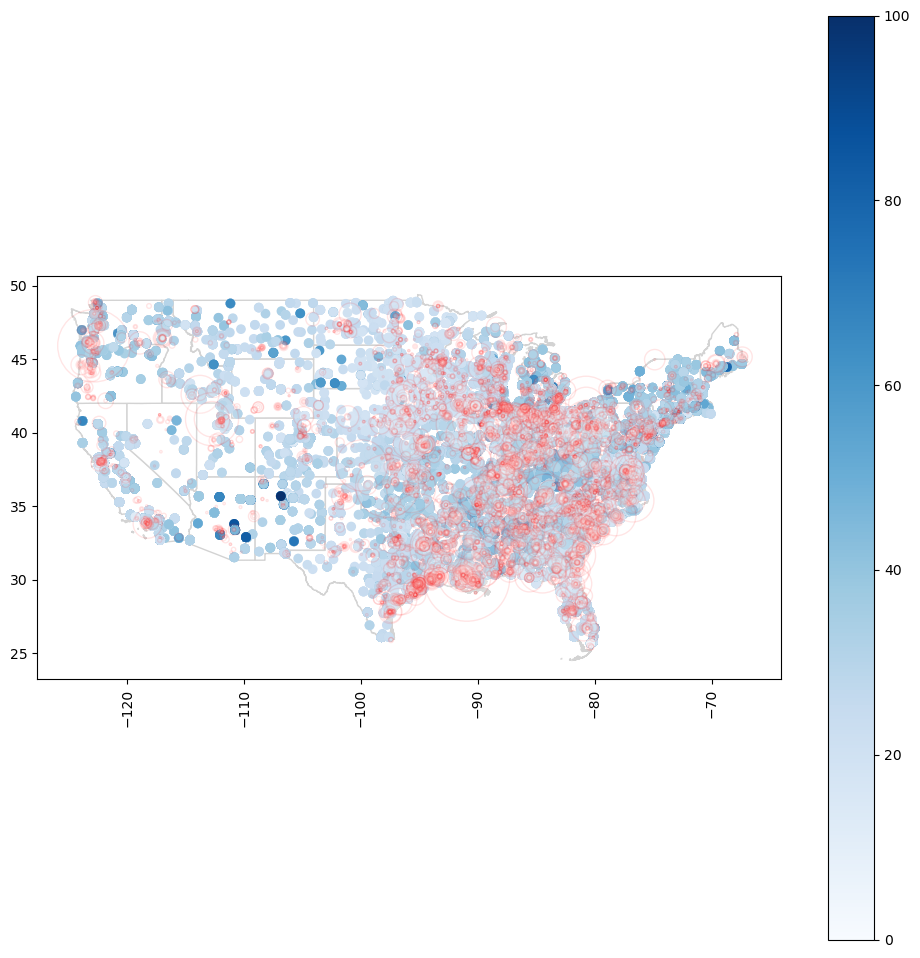

In [81]:
tri_2020_subset["geocoded"] = [(tri_2020_subset.iloc[a]['13. LONGITUDE'], tri_2020_subset.iloc[a]['12. LATITUDE']) 
                      for a in range(len(tri_2020_subset))]

geom = [Point(x) for x in tri_2020_subset[(tri_2020_subset['48. 5.2 - STACK AIR'] > tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.90))].geocoded]
geo_df = gpd.GeoDataFrame(tri_2020_subset[(tri_2020_subset['48. 5.2 - STACK AIR'] > tri_2020_subset['48. 5.2 - STACK AIR'].quantile(0.90))], 
                          crs = {'init':'EPSG:4326'}, 
                          geometry = geom)

fig, ax = plt.subplots(1, figsize=(12, 12))
plt.xticks(rotation=90)

contiguous_states = us_boundary[~us_boundary['STATE'].isin(["MP", "PR", "GU", "AS", "VI", "AK", "HI", "FM", "PW", "MH"])]

markersize = geo_df["48. 5.2 - STACK AIR"] / 2000

contiguous_states.to_crs(epsg=4326).plot(ax=ax, edgecolor='lightgrey', facecolor="white", zorder=1)
geo_df["geometry"].plot(ax=ax, edgecolor="Red", alpha=0.1, markersize=markersize, zorder=3, facecolor="white")

geom = [Point(x) for x in df_joined.geocoded]
geo_df = gpd.GeoDataFrame(df_joined, 
                          crs = {'init':'EPSG:4326'}, 
                          geometry = geom)

geo_df.plot(column="EP_ASTHMA", cmap="Blues", ax=ax, zorder=2)

bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=100))
bar_info._A = []
cbar = fig.colorbar(bar_info)
# geo_df.plot(column="48. 5.2 - STACK AIR", alpha = 0.2, cmap="Purples", ax=ax)

# bar_info = plt.cm.ScalarMappable(cmap="Purples")
# bar_info._A = []
# cbar = fig.colorbar(bar_info)

C:\Users\keyasengupta\AppData\Local\Temp\ipykernel_17456\572595561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tri_2020_subset["geocoded"] = [(tri_2020_subset.iloc[a]['13. LONGITUDE'], tri_2020_subset.iloc[a]['12. LATITUDE'])
C:\Users\keyasengupta\anaconda2\envs\py38\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\keyasengupta\anaconda2\envs\py38\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority

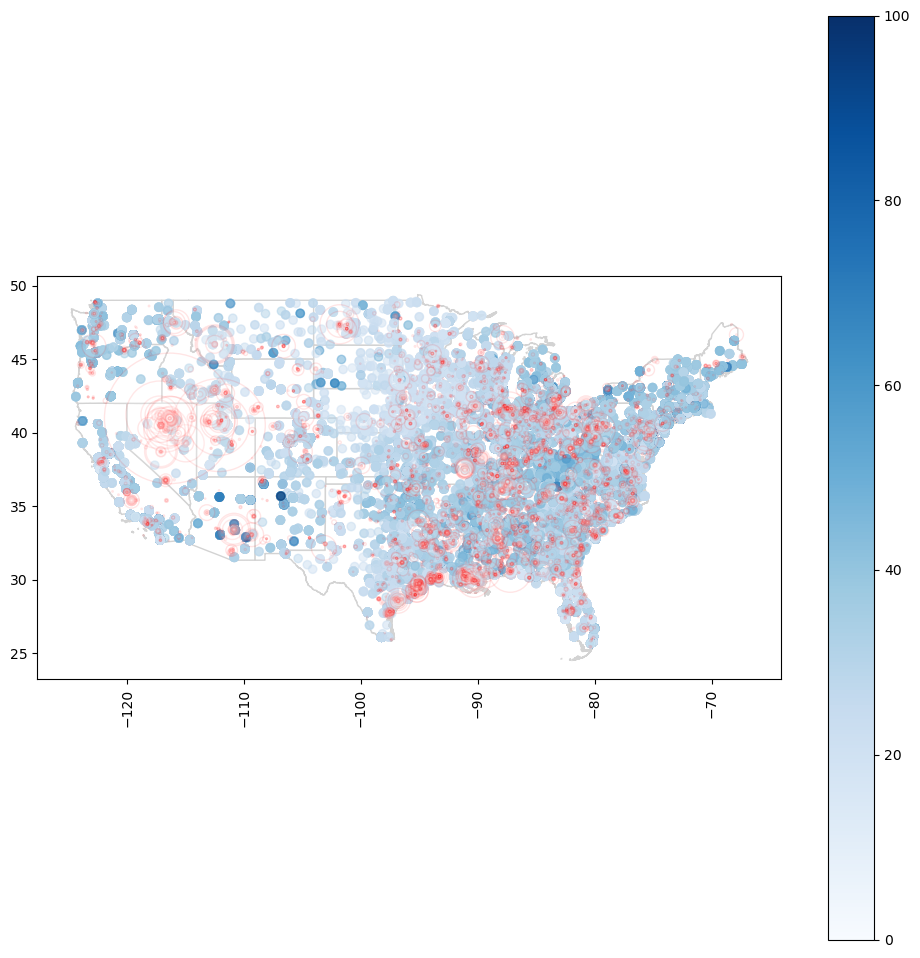

In [84]:
tri_2020_subset["geocoded"] = [(tri_2020_subset.iloc[a]['13. LONGITUDE'], tri_2020_subset.iloc[a]['12. LATITUDE']) 
                      for a in range(len(tri_2020_subset))]

geom = [Point(x) for x in tri_2020_subset[(tri_2020_subset['61. ON-SITE RELEASE TOTAL'] > tri_2020_subset['61. ON-SITE RELEASE TOTAL'].quantile(0.90))].geocoded]
geo_df = gpd.GeoDataFrame(tri_2020_subset[(tri_2020_subset['61. ON-SITE RELEASE TOTAL'] > tri_2020_subset['61. ON-SITE RELEASE TOTAL'].quantile(0.90))], 
                          crs = {'init':'EPSG:4326'}, 
                          geometry = geom)

fig, ax = plt.subplots(1, figsize=(12, 12))
plt.xticks(rotation=90)

contiguous_states = us_boundary[~us_boundary['STATE'].isin(["MP", "PR", "GU", "AS", "VI", "AK", "HI", "FM", "PW", "MH"])]

markersize = geo_df["61. ON-SITE RELEASE TOTAL"] / 20000

contiguous_states.to_crs(epsg=4326).plot(ax=ax, edgecolor='lightgrey', facecolor="white", zorder=1)
geo_df["geometry"].plot(ax=ax, edgecolor="Red", alpha=0.1, markersize=markersize, zorder=3, facecolor="white")

geom = [Point(x) for x in df_joined.geocoded]
geo_df = gpd.GeoDataFrame(df_joined, 
                          crs = {'init':'EPSG:4326'}, 
                          geometry = geom)

geo_df.plot(column="EP_ASTHMA", cmap="Blues", alpha = 0.5, ax=ax, zorder=2)

bar_info = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=100))
bar_info._A = []
cbar = fig.colorbar(bar_info)
# geo_df.plot(column="48. 5.2 - STACK AIR", alpha = 0.2, cmap="Purples", ax=ax)

# bar_info = plt.cm.ScalarMappable(cmap="Purples")
# bar_info._A = []
# cbar = fig.colorbar(bar_info)

In [69]:
geo_df["geometry"]

7         POINT (-95.55755 39.05336)
32        POINT (-95.55755 39.05336)
60       POINT (-122.23536 47.39647)
216       POINT (-77.38266 37.30195)
487       POINT (-87.42282 39.92386)
                    ...             
77140     POINT (-79.06110 40.38420)
77171     POINT (-80.98831 33.96122)
77183     POINT (-78.21250 34.35220)
77226     POINT (-99.92975 37.77701)
77228     POINT (-78.21250 34.35220)
Name: geometry, Length: 763, dtype: geometry

In [22]:
tri_2020[tri_2020['48. 5.2 - STACK AIR'] != 0]['48. 5.2 - STACK AIR']

2            49.00
3           125.10
5         10232.00
7        544484.87
9          3886.00
           ...    
77233       395.00
77235         1.00
77236         5.00
77237       140.00
77238       186.00
Name: 48. 5.2 - STACK AIR, Length: 43883, dtype: float64

In [61]:
us_boundary["STATE"].unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'ME',
       'MI', 'MN', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY', 'MO', 'SC', 'GU', 'MD',
       'PW', 'MH', 'MP', 'FM'], dtype=object)